In [ ]:
%pip install matplotlib
%pip install scipy
%pip install community
%pip install python-louvain
!pip install graphrole

In [49]:
import networkx as nx
import matplotlib.pyplot as plt
import scipy as sp
import community.community_louvain
import numpy as np
import matplotlib.cm as cm
#from graphrole import RecursiveFeatureExtractor, RoleExtractor


In [57]:
G = nx.read_edgelist("Ips.csv", delimiter=",")

In [25]:
print("Nodes length: "+str(len(G.nodes)))
print("Edges length: "+str(len(G.edges)))

Nodes length: 23515
Edges length: 54734


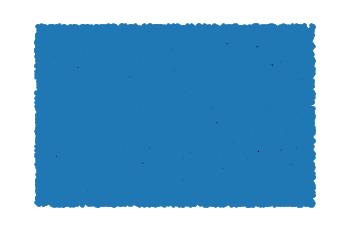

<Figure size 3.6e+06x3.6e+06 with 0 Axes>

In [31]:
pos = nx.random_layout(G)
# nodes
nx.draw_networkx_nodes(G, pos, node_size=12)
# edges
nx.draw_networkx_edges(G, pos, width=0.5,alpha=0.2)
plt.axis('off')
plt.figure(figsize=(50000,50000))
plt.show()

k_cores Nodes length: 2577
k_cores Edges length: 15398


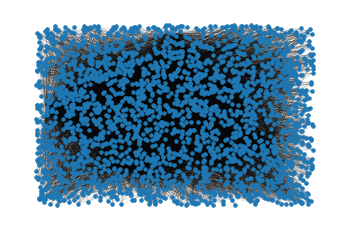

<Figure size 3.6e+06x3.6e+06 with 0 Axes>

In [35]:
k_cores = nx.k_core(G)

print("k_cores Nodes length: "+str(len(k_cores.nodes)))
print("k_cores Edges length: "+str(len(k_cores.edges)))

pos = nx.random_layout(k_cores)
# nodes
nx.draw_networkx_nodes(k_cores, pos, node_size=12)
# edges
nx.draw_networkx_edges(k_cores, pos, width=0.5,alpha=0.2)
plt.axis('off')
plt.figure(figsize=(50000,50000))
plt.show()

[0 1 2 3 4 5 6 7 8]


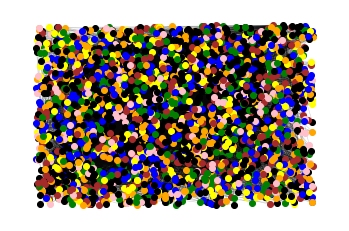

<Figure size 2.88e+06x2.88e+06 with 0 Axes>

In [58]:
###COMUNIDADES###

partition = community.community_louvain.best_partition(G)
print(np.unique(list(partition.values())))

pos = nx.random_layout(k_cores)

for n in k_cores.nodes():
    if partition[n] == 0:
        color = "red"
    elif partition[n] == 1:
        color = "blue"
    elif partition[n] == 2:
        color = "green"
    elif partition[n] == 3:
        color = "orange"
    elif partition[n] == 4:
        color = "yellow"
    elif partition[n] == 5:
        color = "black"
    elif partition[n] == 6:
        color = "brown"
    elif partition[n] == 7:
        color = "pink"
    elif partition[n] == 8:
        color = "grey"
    else:
       print("ERROR")
       break
    nx.draw_networkx_nodes(k_cores, pos, nodelist=[n], node_size=36, node_color=color)
# edges
nx.draw_networkx_edges(k_cores, pos, width=0.5,alpha=0.2)
# labels
#nx.draw_networkx_labels(G, pos, font_size=8, font_family='sans-serif')
#labels = nx.get_edge_attributes(G, 'weight')
#nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.axis('off')
plt.figure(figsize=(40000,40000))
plt.show()

In [61]:
nodes = {}
for k,v in partition.items():
    if v in nodes:
        nodes[v] += 1
    else:
        nodes[v] = 1
print(nodes)

{0: 2, 5: 1897, 3: 3517, 4: 3662, 7: 3679, 1: 3583, 2: 3584, 6: 3589, 8: 2}


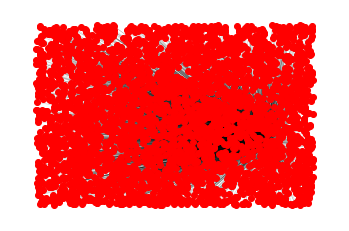

<Figure size 2.88e+06x2.88e+06 with 0 Axes>

{0: 3589}


In [65]:
###SUBCOMUNIDADES###

COMUNIDAD = 6
sub_graph = nx.Graph()

sub_nodes = []
for k,v in partition.items():
    if v == COMUNIDAD:
        sub_nodes.append(k)
sub_graph.add_nodes_from(sub_nodes)

sub_edges = []
for e in G.edges():
    if partition[e[0]] == COMUNIDAD and partition[e[1]] == COMUNIDAD:
        sub_edges.append(e) 
sub_graph.add_edges_from(sub_edges)

partition_sub = community.community_louvain.best_partition(sub_graph)
k_cores2 = nx.k_core(sub_graph)
pos_sub = nx.random_layout(k_cores2)
for n in k_cores2.nodes():
    if partition_sub[n] == 0:
        color = "red"
    elif partition_sub[n] == 1:
        color = "blue"
    elif partition_sub[n] == 2:
        color = "green"
    elif partition_sub[n] == 3:
        color = "orange"
    elif partition_sub[n] == 4:
        color = "yellow"
    elif partition_sub[n] == 5:
        color = "black"
    elif partition_sub[n] == 6:
        color = "brown"
    elif partition_sub[n] == 7:
        color = "pink"
    elif partition_sub[n] == 8:
        color = "grey"
    else:
       print("ERROR")
       break
    nx.draw_networkx_nodes(k_cores2, pos_sub, nodelist=[n], node_size=36, node_color=color)
# edges
nx.draw_networkx_edges(k_cores2, pos_sub, width=0.5,alpha=0.2)
# labels
#nx.draw_networkx_labels(G, pos, font_size=8, font_family='sans-serif')
#labels = nx.get_edge_attributes(G, 'weight')
#nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.axis('off')
plt.figure(figsize=(40000,40000))
plt.show()

sub_nodes = {}
for k,v in partition_sub.items():
    if v in sub_nodes:
        sub_nodes[v] += 1
    else:
        sub_nodes[v] = 1
print(sub_nodes)

In [ ]:
#motifs

In [58]:
'''
#Features are then extracted from a graph G into a pandas.DataFrame:
feature_extractor = RecursiveFeatureExtractor(G)
features = feature_extractor.extract_features()

#these features are used to learn roles. The number of roles is automatically 
#determined by a model selection procedure when n_roles=None is passed to the
#RoleExtractor class instance. Alternatively, n_roles can be set to a desired 
#number of roles to be extracted.
role_extractor = RoleExtractor(n_roles=None)
role_extractor.extract_role_factors(features)

#The role assignment for each node can be retrieved as a dictionary
print("ROLE ASSIGMENT")
print(role_extractor.roles)
print("\n\n")

#Alternatively, roles can be viewed as a soft assignment and a node's percent
#membership to each role can be retrieved as a pandas.DataFrame
print("PROBABILITYS FOR EACH NODE")
print(role_extractor.role_percentage)
print("\n\n")
'''

ModuleNotFoundError: No module named 'graphrole'